# Visualisation des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%run Fusion_donnees.ipynb

## Un peu de démographie

**Les pays les plus peuplés et les moins peuplés en moyenne entre 1992 et 2020**

In [236]:
Pop = df.groupby('Country Name').agg({'Population': "mean"}).sort_values('Population', ascending = False).head(10)
Pop

,Population
Country Name,
People's Republic of China,1.302351e+09
India,1.191362e+09
United States,2.964254e+08
Brazil,1.859639e+08
Russian Federation,1.448518e+08
Japan,1.266636e+08
Pakistan,1.139111e+08
Mexico,1.079991e+08
Egypt,8.740237e+07


In [223]:
Pop_min = df.groupby('Country Name').agg({'Population': "mean"}).sort_values('Population', ascending = False).tail(10)
Pop_min

,Population
Country Name,
Gabon,1.749677e+06
Estonia,1.371323e+06
Trinidad and Tobago,1.308608e+06
Cyprus,1.135046e+06
Montenegro,6.206010e+05
Suriname,4.206580e+05
Bahrain,4.187570e+05
Iceland,2.993095e+05
Chile,1.518673e+05


**Les pays les plus riches et les plus pauvres en moyenne sur la periode**

In [242]:
PIB_max = df.groupby('Country Name').agg({'PIB par hab': "mean"}).sort_values('PIB par hab', ascending = False).head(10)
PIB_max

,PIB par hab
Country Name,
Norway,62487.495741
Singapore,50800.711064
Chile,50066.976893
Qatar,47554.743643
Ireland,45862.648007
Sweden,44584.559533
Iceland,44519.871354
United States,44356.852149
Japan,39581.117526


In [243]:
PIB_min = df.groupby('Country Name').agg({'PIB par hab': "mean"}).sort_values('PIB par hab', ascending = True).head(10)
PIB_min

,PIB par hab
Country Name,
Burundi,201.983772
Mozambique,280.503504
Ethiopia,382.140519
Eritrea,407.769077
Pakistan,429.146902
Afghanistan,501.754697
Uganda,633.182474
Kyrgyzstan,806.541500
Tajikistan,830.754799


## Les pays qui ont le plus de médailles entre 1992 et 2020

**Les pays qui ont gagné le plus de médailles au total, toutes années confondues**


In [212]:
df1 = df.groupby('Country Name').agg({'Total': "sum"}).sort_values('Total', ascending = False).head(10)
df1

,Total
Country Name,
United States,853
People's Republic of China,574
Russian Federation,425
Great Britain,341
Australia,332
France,290
Japan,253
Italy,243
Republic of Korea,217


In [213]:
df1 = df1.reset_index()
df1.sort_values("Total",ascending = True, inplace = True)

Text(0.5, 0, 'Nombre total de médailles entre 1992 et 2020')

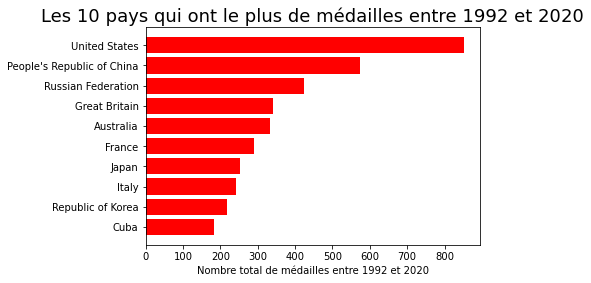

In [216]:
plt.barh(df1["Country Name"], df1['Total'], color="red")
plt.title('Les 10 pays qui ont le plus de médailles entre 1992 et 2020', size=18)
plt.xlabel('Nombre total de médailles entre 1992 et 2020')

Ce sont les Etats-Unis qui ont gagné le plus de médailles sur la période, avec un total de 853 médailles. Ensuite viennent la Chine avec 574 médailles, et la Russie avec 425 médailles. 

**Les pays qui ont gagné le moins de médaille au total entre 1992 et 2020**

In [217]:
df_min = df.groupby('Country Name').agg({'Total': "sum"}).sort_values('Total', ascending = True).head(20)
df_min

,Total
Country Name,
Turkmenistan,1
Eritrea,1
Suriname,1
Gabon,1
Peru,1
Panama,1
Pakistan,1
Cyprus,1
Montenegro,1


In [218]:
df_min = df_min.reset_index()
df_min.sort_values("Total",ascending = True, inplace = True)

Text(0.5, 0, 'Nombre total de médailles entre 1992 et 2020')

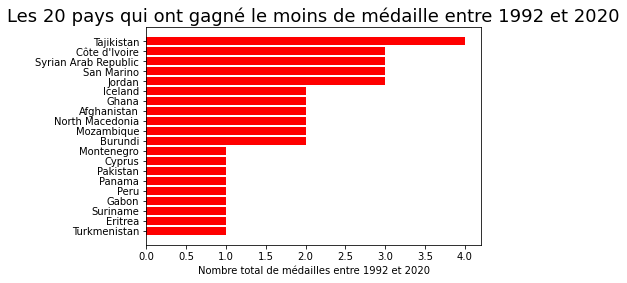

In [220]:
plt.barh(df_min["Country Name"], df_min['Total'], color="red")
plt.title('Les 20 pays qui ont gagné le moins de médaille entre 1992 et 2020', size=18)
plt.xlabel('Nombre total de médailles entre 1992 et 2020')

Parmi ces pays, on retrouve un bon nombre des pays les moins peuplés en moyenne sur la période : Iceland, Montenegro, Suriname. 
On retrouve aussi les pays ayant les PIB par habitant le plus bas. 

**Pour chaque année, les trois pays qui ont gagné le plus de médailles au total**

In [90]:
df2 = df_medailles.sort_values(['Annee','Total'],ascending = (True, False)).groupby('Annee').head(3)
df2

,Country Name,Country Code,Gold,Silver,Bronze,Total,Annee,Lieu,Pays_hote,Code_pays_hote
0,Unified Team,EUN,45,38,29,112,1992,Barcelona,Spain,ESP
1,United States,USA,37,34,37,108,1992,Barcelona,Spain,ESP
2,Germany,GER,33,21,28,82,1992,Barcelona,Spain,ESP
64,United States,USA,44,32,25,101,1996,Atlanta,United States,USA
66,Germany,GER,20,18,27,65,1996,Atlanta,United States,USA
65,Russian Federation,RUS,26,21,16,63,1996,Atlanta,United States,USA
143,United States,USA,37,24,32,93,2000,Sydney,Australia,AUS
144,Russian Federation,RUS,32,28,29,89,2000,Sydney,Australia,AUS
145,People's Republic of China,CHN,28,16,14,58,2000,Sydney,Australia,AUS
223,United States,USA,36,39,26,101,2004,Athina,Greece,GRE


In [91]:
df2['Annee']= df2['Annee'].astype(str)
df3 = df2[['Total','Annee', 'Country Name','Country Code']]
df3

,Total,Annee,Country Name,Country Code
0,112,1992,Unified Team,EUN
1,108,1992,United States,USA
2,82,1992,Germany,GER
64,101,1996,United States,USA
66,65,1996,Germany,GER
65,63,1996,Russian Federation,RUS
143,93,2000,United States,USA
144,89,2000,Russian Federation,RUS
145,58,2000,People's Republic of China,CHN
223,101,2004,United States,USA


Les Etats-Unis remportent le plus de médailles chaque année, excepté en 1992 (à nuancer car cette année-là, c'est la Unified Team qui remporte le plus de médaille).La Chine et la Russie sont alternativement le deuxième et le troisième pays à gagner le plus de médailles.

In [92]:
#Création d'une variable avec le classement : 1er, 2e ou 3e
#On commence par réinitialiser l'index et le faire passer en variable car on l'utilise ensuite pour créer la variable classement
df3.reset_index(drop=True, inplace=True)
df3.reset_index(inplace=True)

In [93]:
#Création d'une variable avec le classement : 1er, 2e ou 3e
#Pour le classement, comme pour chaque année, les 3 pays sont classés par ordre décroissant du total, alors on prend
#l'index modulo 3, et on fait +1 car l'index part de 0.
df3_classement = df3.assign(Classement = df3["index"].mod(3)+1)
df3_classement

,index,Total,Annee,Country Name,Country Code,Classement
0,0,112,1992,Unified Team,EUN,1
1,1,108,1992,United States,USA,2
2,2,82,1992,Germany,GER,3
3,3,101,1996,United States,USA,1
4,4,65,1996,Germany,GER,2
5,5,63,1996,Russian Federation,RUS,3
6,6,93,2000,United States,USA,1
7,7,89,2000,Russian Federation,RUS,2
8,8,58,2000,People's Republic of China,CHN,3
9,9,101,2004,United States,USA,1


Text(0.5, 1.0, 'Les 3 pays qui ont remporté le plus de médailles par année')

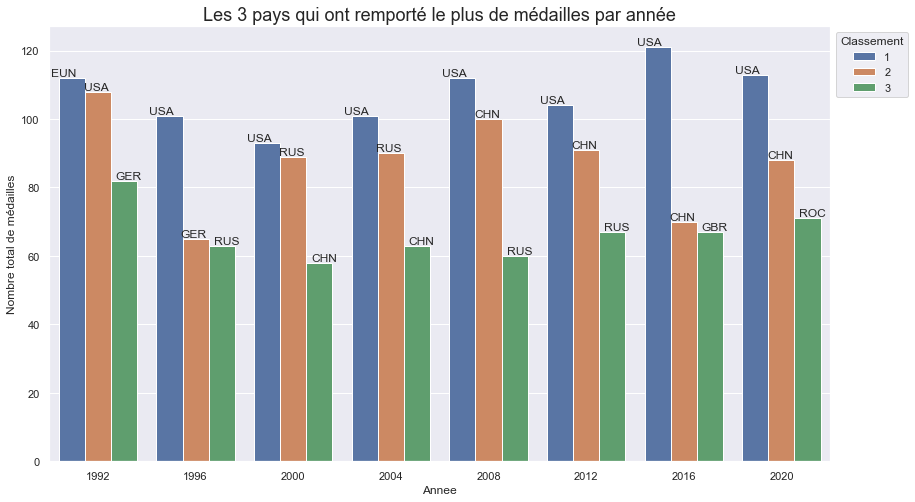

In [94]:
plt.figure(figsize=(14, 8)) #taille du graphique

bar = sns.barplot(x="Annee", y="Total", hue="Classement", data=df3_classement) #trace le barplot

pays=df3_classement['Country Code']
total=df3_classement['Total']

for i in range(len(pays)): #ajout des noms des pays sur les barres
    bar.text(i/3-0.35, 
            total[i]+0.5,
            pays[i],
            ha="center")
    
plt.ylabel("Nombre total de médailles")
plt.legend(title="Classement", loc = 2, bbox_to_anchor = (1,1))
plt.title('Les 3 pays qui ont remporté le plus de médailles par année', size=18)

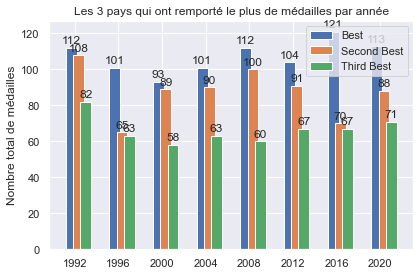

In [96]:
################ INUTILE, A SUPPRIMER ###################""

#Préparation pour le graphique
#listes du total de médaille du 1er, du 2nd et du 3e

df_best = df3.groupby('Annee').agg({'Total': "max"})
df_secondbest = df_medailles.sort_values(['Annee','Total'],ascending = False).groupby('Annee').head(2)
df_secondbest = df_secondbest.groupby('Annee').agg({'Total': "min"})
df_thirdbest = df3.groupby('Annee').agg({'Total': "min"})



##### Tracé du graphique #####

labels = df3['Annee'].unique()
best = df_best['Total']
secondbest = df_secondbest['Total']
thirdbest = df_thirdbest['Total']

#labels = ['1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']
#best = [112, 101, 93, 101, 112, 104, 121, 113]
#secondbest = [108, 65, 89, 90, 100, 91, 70, 88]
#thirdbest = [82, 63, 58, 63, 60, 67, 67, 71]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, best, width, label='Best')
rects2 = ax.bar(x + width/3, secondbest, width, label='Second Best')
rects3 = ax.bar(x + width, thirdbest, width, label='Third Best')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre total de médailles')
ax.set_title('Les 3 pays qui ont remporté le plus de médailles par année')
#ax.set_xticks(x, labels)
ax.set_xticks(x);ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)

fig.tight_layout()

plt.show()

**Je n'ai pas réussi à mettre une étiquette pour indiquer le nom des 3 pays pour chaque année + ca se chevauche **

En 2016 et en 2020, l'écart du nombre de médailles entre le pays qui a reçu le plus de médailles et le second pays qui a reçu le plus de médailles augmente largement par rapport aux années précédentes où le podium est plus resseré. 

## Le fait d'accueillir les JO est-il lié à de meilleures performances ?

**Le cas du Japon en 2020**

In [192]:
# on ne retient que les resultats du Japon
df6 = df[df['Country Name']=='Japan'] 
# on ne garde que les colonnes du nombre de médailles au total et l'année
df7 = df6[['Total','Annee']]
# on ordonne de facon décroissante le nombre de médailles
dfJAPAN = df7.sort_values('Total', ascending=False)
# on transforme l'année en string sinon le graphique se fait de façon a ce que les années soient chronologiques
dfJAPAN['Annee']= dfJAPAN['Annee'].astype(str)
dfJAPAN

,Total,Annee
2,58,2020
4,41,2016
9,38,2012
4,37,2004
6,25,2008
13,22,1992
12,18,2000
16,14,1996


Text(0.5, 0, 'Nombre total de médailles')

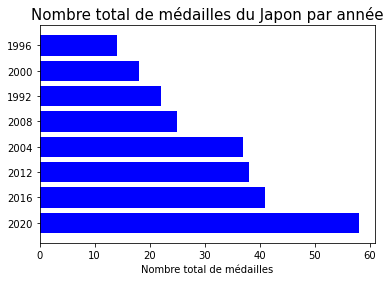

In [195]:
plt.barh(dfJAPAN["Annee"], dfJAPAN['Total'], color="blue")
plt.title('Nombre total de médailles du Japon par année', size=15)
plt.xlabel('Nombre total de médailles')

En 2020, année où le Japon a acceuilli les JO à Tokyo, le Japon a emporté le plus de médailles sur la période. De plus, ce score (58 médailles) se détache clairement des autres années puisque le second meilleur score est de 41 médailles en 2016. 

**Le cas du Royaume-Uni en 2012**

In [196]:
# on ne retient que les resultats de Royaume Uni
df8 = df[df['Country Name']=='Great Britain'] 
# on ne garde que les colonnes du nombre de médailles au total et l'année
df9 = df8[['Total','Annee']]
# on ordonne de facon décroissante le nombre de médailles
dfUK = df9.sort_values('Total', ascending=False)
# on transforme l'année en string sinon le graphique se fait de façon a ce que les années soient chronologiques
dfUK['Annee']= dfUK['Annee'].astype(str)
dfUK

,Total,Annee
1,67,2016
2,65,2012
3,65,2020
3,51,2008
8,30,2004
7,28,2000
10,20,1992
26,15,1996


Text(0.5, 0, 'Nombre total de médailles')

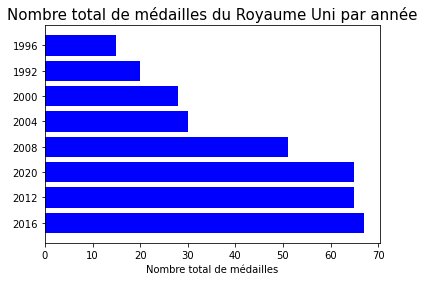

In [197]:
plt.barh(dfUK["Annee"], dfUK['Total'], color="blue")
plt.title('Nombre total de médailles du Royaume Uni par année', size=15)
plt.xlabel('Nombre total de médailles')

Pour le Royaume Uni, l'année où le pays a remporté le plus de médailles ne correspond pas à l'année où le pays a accueilli les JO à Londres. 

**Le cas de l'Espagne**

In [204]:
# on ne retient que les resultats de la Grèce
SPAIN2 = df[df['Country Name']=='Spain'] 
# on ne garde que les colonnes du nombre de médailles au total et l'année
SPAIN = SPAIN2[['Total','Annee']]
# on ordonne de facon décroissante le nombre de médailles
SPAIN = SPAIN.sort_values('Total', ascending=False)
# on transforme l'année en string sinon le graphique se fait de façon a ce que les années soient chronologiques
SPAIN['Annee']= SPAIN['Annee'].astype(str)
SPAIN

,Total,Annee
3,22,1992
16,20,2004
13,20,2012
11,19,2008
11,17,1996
11,17,2016
18,17,2020
20,11,2000


Text(0.5, 0, 'Nombre total de médailles')

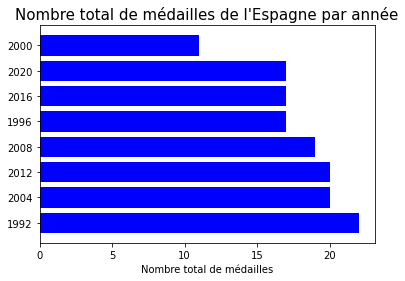

In [205]:
plt.barh(SPAIN["Annee"], SPAIN['Total'], color="blue")
plt.title('Nombre total de médailles de l\'Espagne par année', size=15)
plt.xlabel('Nombre total de médailles')